In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_csv = pd.read_csv("adult.csv")
input_csv.shape

(32561, 15)

In [2]:
input_count = len(input_csv) 
input_count

32561

In [3]:
# Display the input data for preview
input_csv.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Check the number of unique records using groupby
csv_group = input_csv.groupby(["age", "workclass", "fnlwgt",
                               "education","education.num","marital.status", 
                               "occupation","relationship","race",
                               "sex", "capital.gain","capital.loss",
                               "hours.per.week","native.country","income"])
csv_group_count = len(csv_group)
csv_group_count

32537

In [5]:
# Get all the data for the duplicate rows
duplicateRow = input_csv[input_csv.duplicated()]
duplicateRow

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [6]:
duplicateRow.shape

(24, 15)

In [7]:
# List the index for each duplicated rows
list_index = input_csv[input_csv.duplicated()].index.tolist()
list_index

[8453,
 8645,
 12202,
 14346,
 15603,
 17344,
 19067,
 20388,
 20507,
 22783,
 22934,
 23276,
 23660,
 23720,
 23827,
 26738,
 27133,
 28796,
 29051,
 29334,
 29604,
 31060,
 32065,
 32419]

In [8]:
# Create a clean DataFrame by dropping the duplicate rows by its index
dropped_df = input_csv.drop(list_index)
dropped_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
dropped_df.shape

(32537, 15)

In [10]:
replaced_df = dropped_df.replace(to_replace ="?", 
                                 value ="NA") 

In [11]:
replaced_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [12]:
over_50k = replaced_df[replaced_df["income"] == ">50K"]
over_50k.shape

(7839, 15)

In [13]:
under_50k = replaced_df[replaced_df["income"] == "<=50K"]
under_50k.shape

(24698, 15)

In [14]:
gender_over_50k = over_50k["sex"].value_counts()

In [15]:
gender_under_50k = replaced_df["sex"][replaced_df["income"] == "<=50K"].value_counts()

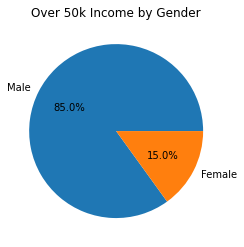

In [16]:
gender_over_50k.plot(kind="pie", autopct="%1.1f%%")
plt.title("Over 50k Income by Gender")
plt.ylabel("")
plt.show()

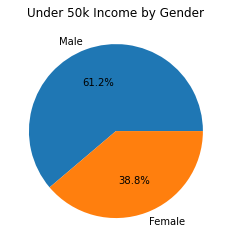

In [17]:
gender_under_50k.plot(kind="pie", autopct="%1.1f%%")
plt.title("Under 50k Income by Gender")
plt.ylabel("")
plt.show()

In [20]:
education_over_50k = replaced_df["education.num"][replaced_df["income"] == ">50K"]
education_under_50k = replaced_df["education.num"][replaced_df["income"] == "<=50K"]

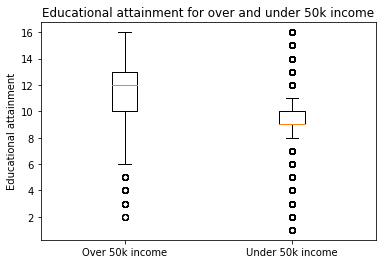

In [21]:
graph = [education_over_50k, education_under_50k]
labels = ["Over 50k income", "Under 50k income"]
fig1, ax1 = plt.subplots()
ax1.set_title("Educational attainment for over and under 50k income")
ax1.set_ylabel("Educational attainment")
ax1.boxplot(graph, labels=labels)
plt.show()